<div style="font-weight: bold" align="center">
    <div style="font-size: xx-large; color:#3d6f91">Computación Numérica</div><br>
    <div style="font-size: x-large; color:gray">Práctica 2</div><br>
    <div style="font-size: large; color: #5D8AA8">Óscar Gómez Borzdynski y Alejandro Cabana Suárez</div><br></div><hr>
</div>

In [1]:
import matplotlib.pyplot as plt
import sys
import numpy as np
from scipy import interpolate

In [2]:
%%html
<style>
    h1, h2, h3 {color: #3d6f91;}
    b {color: #5D8AA8;}
</style>

## Cuestiones teóricas

<b>Si una función es periódica ¿Puede estar bien interpolada por un polinomio de Hermite?</b>

No, ningún polinomio puede aproximar bien una función periódica ya que tiene finitas derivadas no nulas y en los extremos es siempre creciente o siempre decreciente.

<b>En qué condiciones pensáis que un polinomio de Hermite puede interpolar bien una función periódica.</b>

Nunca podremos interpolar una función periódica en todo el dominio mediante un polinomio, pero podemos intentar interpolar un periodo y repetir sus valores a lo largo del dominio.

<b>¿Qué método pensáis que podría ser mejor para implementar funciones periódicas?</b>

Pensamos que la interpolación por series de Fourier, por estar formadas por funciones periódicas será la mejor forma de aproximar funciones periódicas.

## Ejercicio 1

In [3]:
def f(x):
    return np.cos(x)**2 - np.sin(x)

<b>¿Es una función periódica?</b>

Sí, pues está compuesta por sumas y productos de funciones periódicas.

In [4]:
values = [i*np.pi/32 for i in range(641)]
fun_values = f(values)

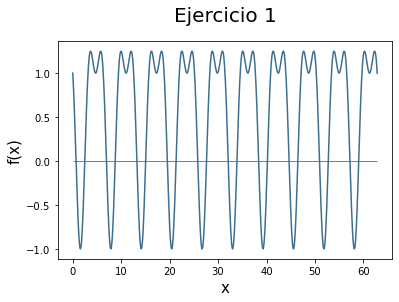

In [5]:
plt.plot(values, fun_values, color='#3d6f91')
plt.title("Ejercicio 1", fontsize=20, pad=20)
plt.hlines(y=0, xmin = min(values), xmax = max(values), color='k', lw=0.5)
plt.xlabel('x', fontsize=15)
_=plt.ylabel('f(x)', fontsize=15)

## Ejercicio 2

In [6]:
def coefs(f, x):
    M = np.ones((640,641)) # Comenzamos con una matriz de unos
    M = np.exp(M*(1j/10)*np.repeat([range(640)], 641, axis=0).T*x) # Multiplicamos por e**(i(n/10)*x_k)
    F = f(x)
    C = (M @ F) * (np.pi/32) # f(x) * M
    return C

In [7]:
C = coefs(f,values)

In [8]:
print(len(C))

640


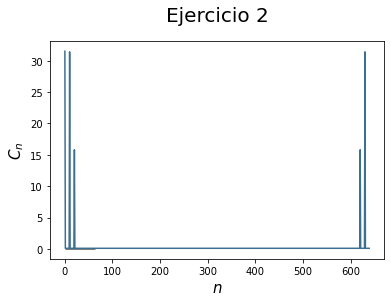

In [9]:
plt.plot(np.absolute(C), color='#3d6f91')
plt.title("Ejercicio 2", fontsize=20, pad=20)
plt.hlines(y=0, xmin = min(values), xmax = max(values), color='k', lw=0.5)
plt.xlabel('$n$', fontsize=15)
_ = plt.ylabel('$C_n$', fontsize=15)

## Ejercicio 3

In [10]:
def eval(coefs, x):
    M = np.ones(640)
    M = np.exp(M*(-1j/10)*np.array(range(640))*x)
    F = (M @ coefs)*(32/np.pi) / 640
    return F

C:\Users\Cabanator\Anaconda3\envs\MUCD-CN\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


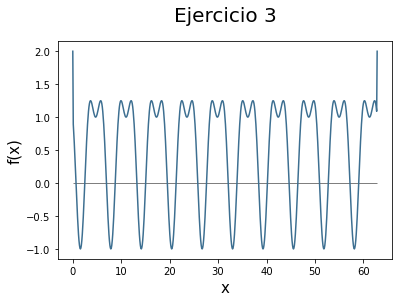

In [11]:
plt.plot(values, [eval(C,val) for val in values], color='#3d6f91')
plt.title("Ejercicio 3", fontsize=20, pad=20)
plt.hlines(y=0, xmin = min(values), xmax = max(values), color='k', lw=0.5)
plt.xlabel('x', fontsize=15)
_=plt.ylabel('f(x)', fontsize=15)

In [12]:
def abserror(f, C, val):
    return abs(eval(C,val) - f(val))

print(abserror(f,C,2.5))
print(abserror(f,C,0))
print(abserror(f,C,0.01))
print(abserror(f,C,0.1))
print(abserror(f,C,np.pi))

1.3401688327670576
1.0000000000000315
1.3097562489881949
0.08519880064708968
7.875756932985039e-14


In [13]:
print(len(C))

640


## Preguntas opcionales

<b> 1. ¿Por qué en la fórmula ck = $\int_{-\infty}^{\infty}f(x)e^{2\pi ikx}\,dx$, tomamos como valores de $k$ al aproximar mediante sumas de Riemann números de la forma $h_n =\frac{32n}{640\pi}$?.
    
Nota: La respuesta no es fácil, y tiene que ver con la razón por la cual los Compact Disc
tienen una tasa de muestreo de 44.100 Hz, os tocará tirar un poco de bibliografía. </b>

Investigando hemos visto que $44100$ es el producto de los cuatro primeros primos al cuadrado, por lo que es divisible entre $2, 3, 4, 5, 6, 7\dots$, divisores útiles en el ámbito musical. Sin embargo, no vemos la relación con el problema actual.

In [14]:
print((2*3*5*7)**2)

44100


<b> 3. Aproximad ahora la función mediante Splines, Smooth Splines y polinomios de Legendre. ¿Con cuál de los cuatro métodos obtenéis una mejor aproximación? </b>

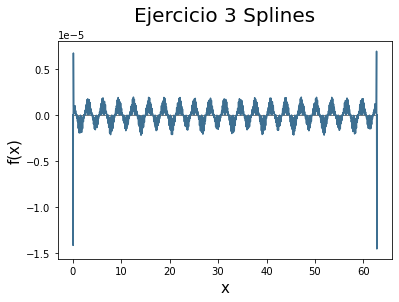

In [15]:
vals = np.linspace(0,20*np.pi, 1000)
tck = interpolate.splrep(values, f(values), k=3)
intval = interpolate.splev(vals, tck)

plt.plot(vals, f(vals) - intval, color='#3d6f91')
plt.title("Ejercicio 3 Splines", fontsize=20, pad=20)
plt.hlines(y=0, xmin = min(values), xmax = max(values), color='k', lw=0.5)
plt.xlabel('x', fontsize=15)
_=plt.ylabel('f(x)', fontsize=15)

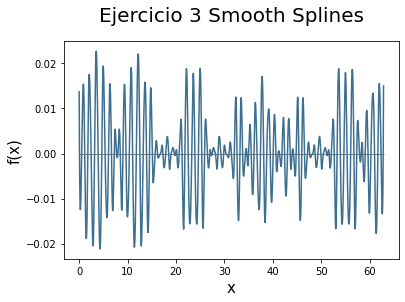

In [16]:
vals = np.linspace(0,20*np.pi, 1000)
tck = interpolate.splrep(values, f(values), k=3, s=0.05)
intval = interpolate.splev(vals, tck)

plt.plot(vals, f(vals) - intval, color='#3d6f91')
plt.title("Ejercicio 3 Smooth Splines", fontsize=20, pad=20)
plt.hlines(y=0, xmin = min(values), xmax = max(values), color='k', lw=0.5)
plt.xlabel('x', fontsize=15)
_=plt.ylabel('f(x)', fontsize=15)

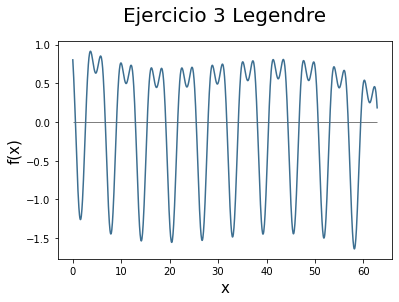

In [17]:
vals = np.linspace(0,20*np.pi, 1000)
tck = np.polynomial.legendre.legfit(values, f(values), deg = 3)
intval = np.polynomial.legendre.legval(vals, tck)

plt.plot(vals, f(vals) - intval, color='#3d6f91')
plt.title("Ejercicio 3 Legendre", fontsize=20, pad=20)
plt.hlines(y=0, xmin = min(values), xmax = max(values), color='k', lw=0.5)
plt.xlabel('x', fontsize=15)
_=plt.ylabel('f(x)', fontsize=15)

La mejor aproximación es la primera que implementamos en esta práctica, basada en funciones periódicas, aunque parece que la aproximación por polinomios de Legendre también hace un buen trabajo.